<a href="https://colab.research.google.com/github/DhruvAgravat/NIFTY50-ANALYSIS/blob/main/DAI_Assignment(23112008).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/NIFTY50_all.csv")
# Display basic information
print("Dataset Overview:")
print(df.info())
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), 

In [5]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Prev Close           Open           High            Low  \
count  235192.000000  235192.000000  235192.000000  235192.000000   
mean     1266.196349    1267.759708    1286.581440    1247.488465   
std      2581.370320    2585.259609    2619.649216    2546.621396   
min         0.000000       8.500000       9.750000       8.500000   
25%       274.300000     275.000000     279.500000     269.600000   
50%       566.500000     567.025000     576.900000     556.500000   
75%      1242.200000    1243.312500    1263.000000    1221.650000   
max     32861.950000   33399.950000   33480.000000   32468.100000   

                Last          Close          VWAP        Volume      Turnover  \
count  235192.000000  235192.000000  235192.00000  2.351920e+05  2.351920e+05   
mean     1266.388302    1266.554351    1267.13230  3.045903e+06  1.610138e+14   
std      2581.392543    2582.140942    2582.69998  7.333981e+06  3.298085e+14   
min         9.100000       9.

In [6]:
# Handling missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64


In [7]:

df.dropna(inplace=True)  # Dropping rows with missing values

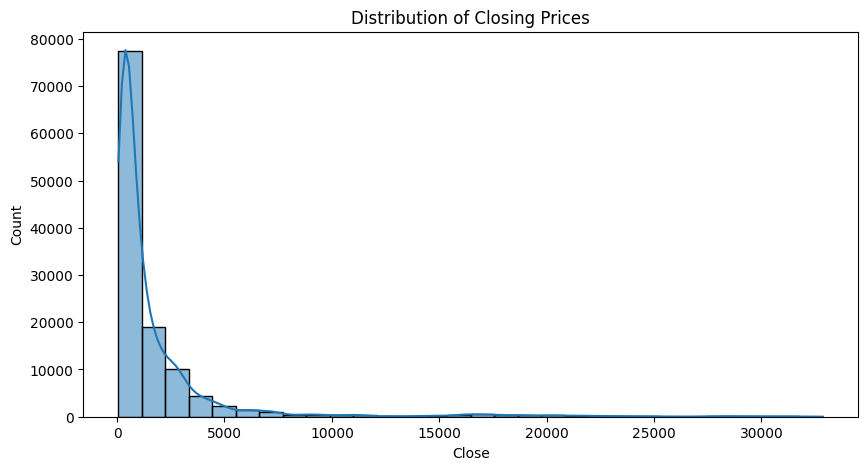

In [8]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title("Distribution of Closing Prices")
plt.show()

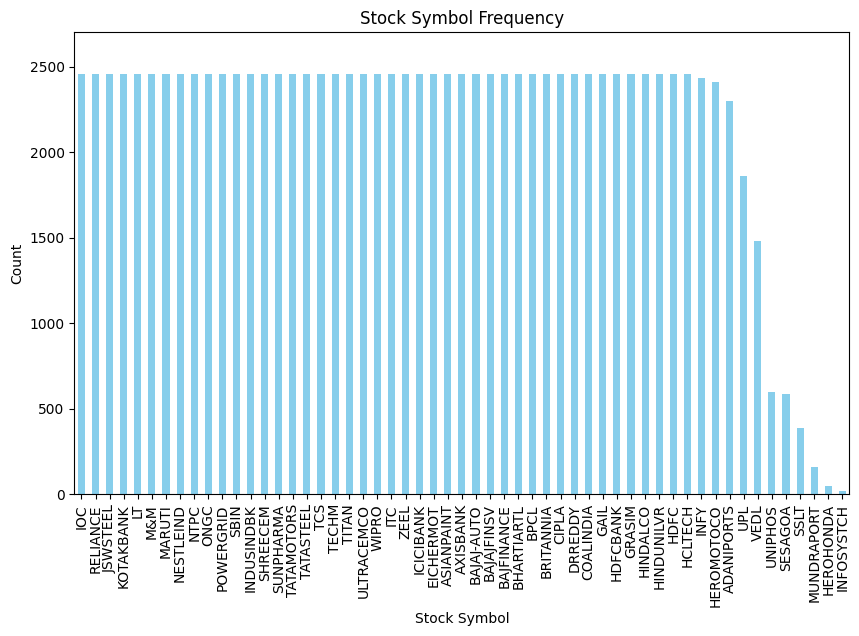

           Date      Symbol Series  Prev Close    Open    High     Low  \
866  2011-06-01  MUNDRAPORT     EQ      161.45  162.10  165.70  161.25   
867  2011-06-02  MUNDRAPORT     EQ      164.00  164.00  165.15  160.15   
868  2011-06-03  MUNDRAPORT     EQ      161.25  161.50  162.80  159.20   
869  2011-06-06  MUNDRAPORT     EQ      161.05  160.50  161.10  159.05   
870  2011-06-07  MUNDRAPORT     EQ      159.85  159.85  162.75  156.35   

       Last   Close    VWAP   Volume      Turnover   Trades  \
866  163.50  164.00  164.08  2574106  4.223703e+13  19171.0   
867  161.15  161.25  162.17  1699298  2.755678e+13  16176.0   
868  161.00  161.05  161.02  1185817  1.909361e+13  14810.0   
869  160.00  159.85  160.09   546378  8.746905e+12   7071.0   
870  157.00  157.25  158.52  2193466  3.477027e+13  17865.0   

     Deliverable Volume  %Deliverble  
866           1271255.0       0.4939  
867            791462.0       0.4658  
868            722154.0       0.6090  
869            38614

In [9]:
# Bar Chart for Stock Count
plt.figure(figsize=(10, 6))
df['Symbol'].value_counts().plot(kind="bar", color='skyblue')
plt.title("Stock Symbol Frequency")
plt.xlabel("Stock Symbol")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.ylim(0, df['Symbol'].value_counts().max() * 1.1)  # Ensure all bars have the same height scale
plt.show()
print(df.head(5))
#The above code shows the frequency of the stock in NIFTY50 which is repeated, hence majority of the stocks level are same in the count number

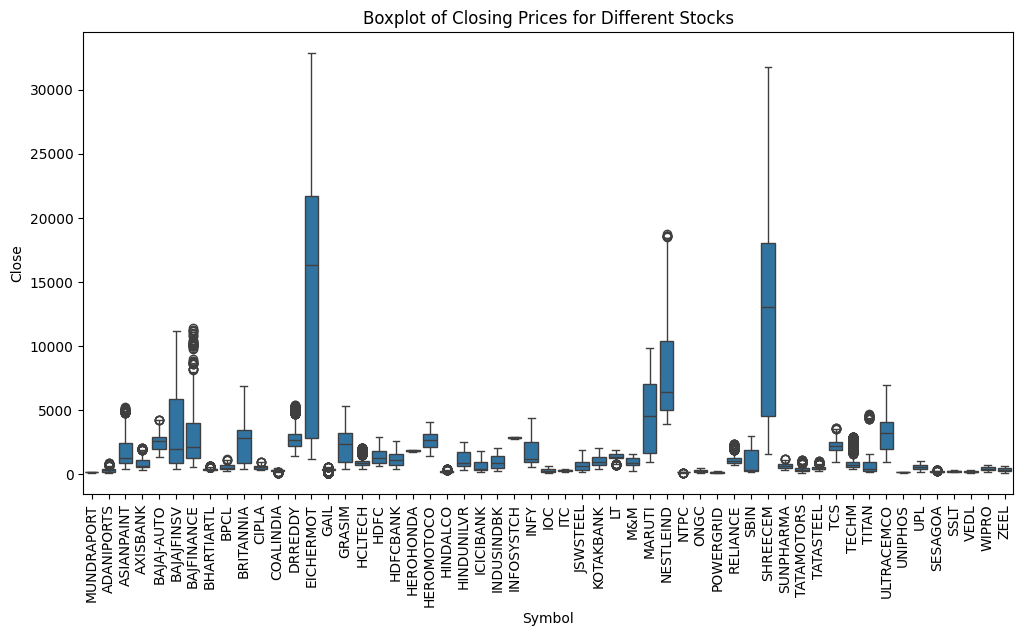

In [10]:
# Box Plot for Different Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Symbol', y='Close', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Closing Prices for Different Stocks")
plt.show()

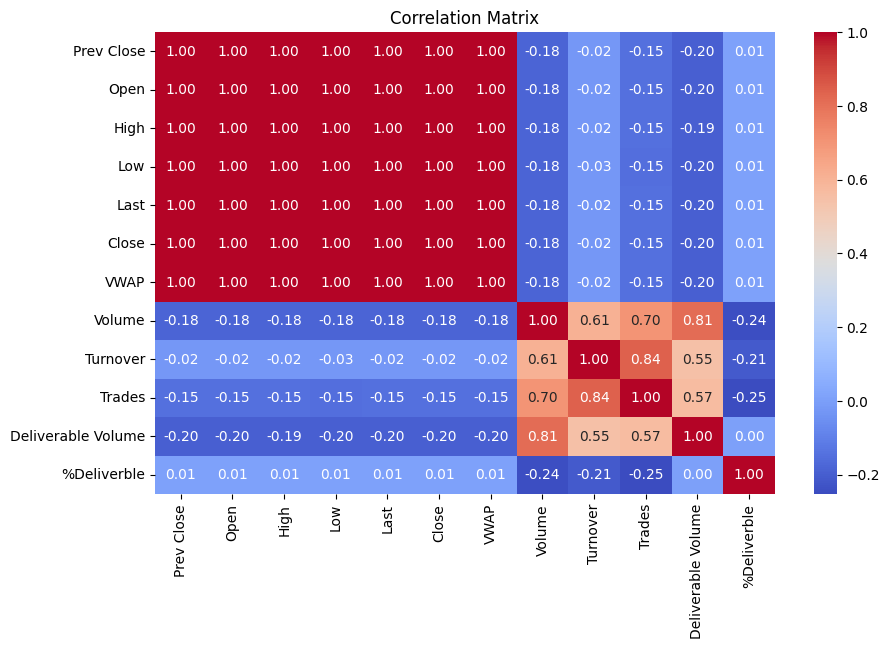

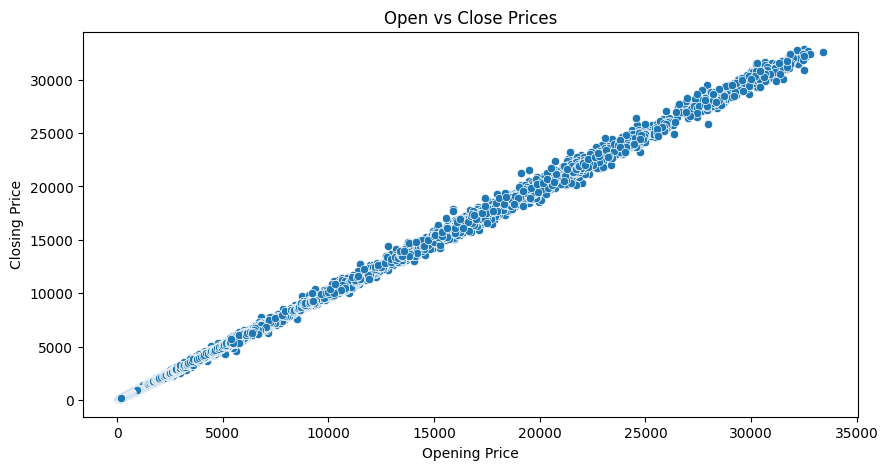

In [11]:
# Multivariate Analysis
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Handle NaN values if present
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Open'], y=df['Close'])
plt.title("Open vs Close Prices")
plt.xlabel("Opening Price")
plt.ylabel("Closing Price")
plt.show()

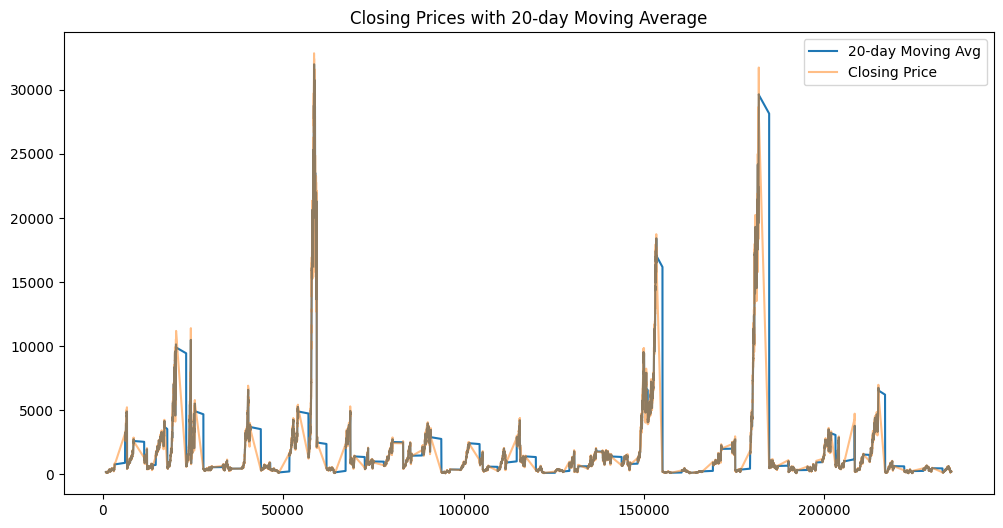

In [12]:
# Moving Average
plt.figure(figsize=(12, 6))
df['Close'].rolling(window=20).mean().plot(label='20-day Moving Avg')
df['Close'].plot(label='Closing Price', alpha=0.5)
plt.legend()
plt.title("Closing Prices with 20-day Moving Average")
plt.show()

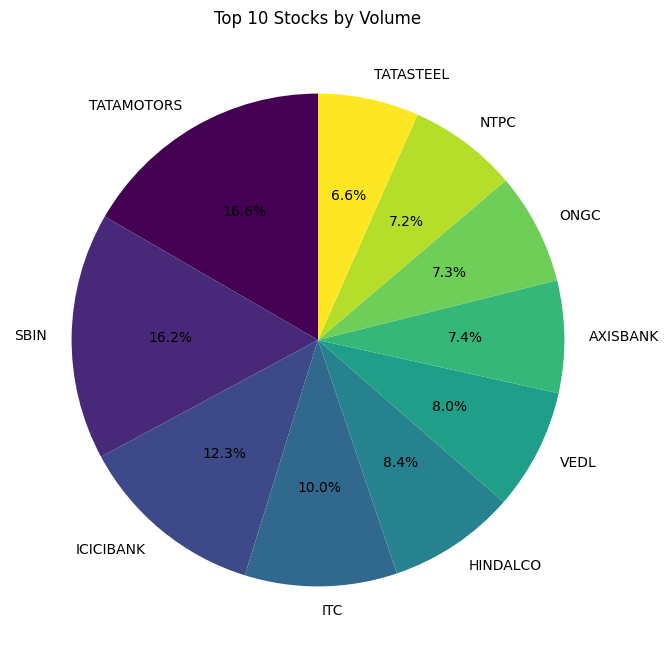

In [13]:
# Pie Chart for Stock Volume Distribution
plt.figure(figsize=(8, 8))
df_grouped = df.groupby('Symbol')['Volume'].sum().nlargest(10)
df_grouped.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Top 10 Stocks by Volume")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()


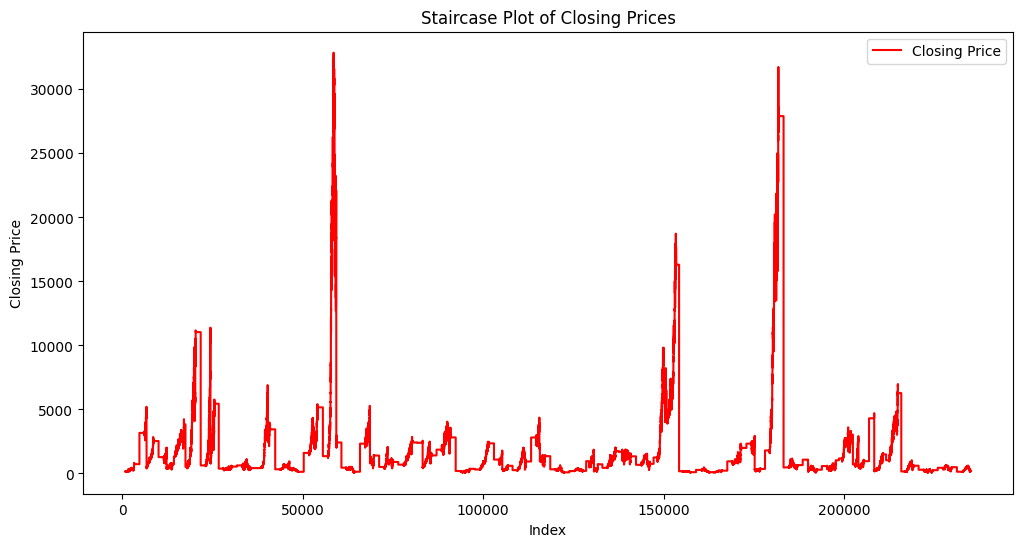

Exploratory Data Analysis Completed.


In [15]:
# Staircase Plot for Closing Prices
plt.figure(figsize=(12, 6))
plt.step(df.index, df['Close'], where='mid', label='Closing Price', color='red')
plt.xlabel("Index")
plt.ylabel("Closing Price")
plt.title("Staircase Plot of Closing Prices")
plt.legend()
plt.show()


print("Exploratory Data Analysis Completed.")